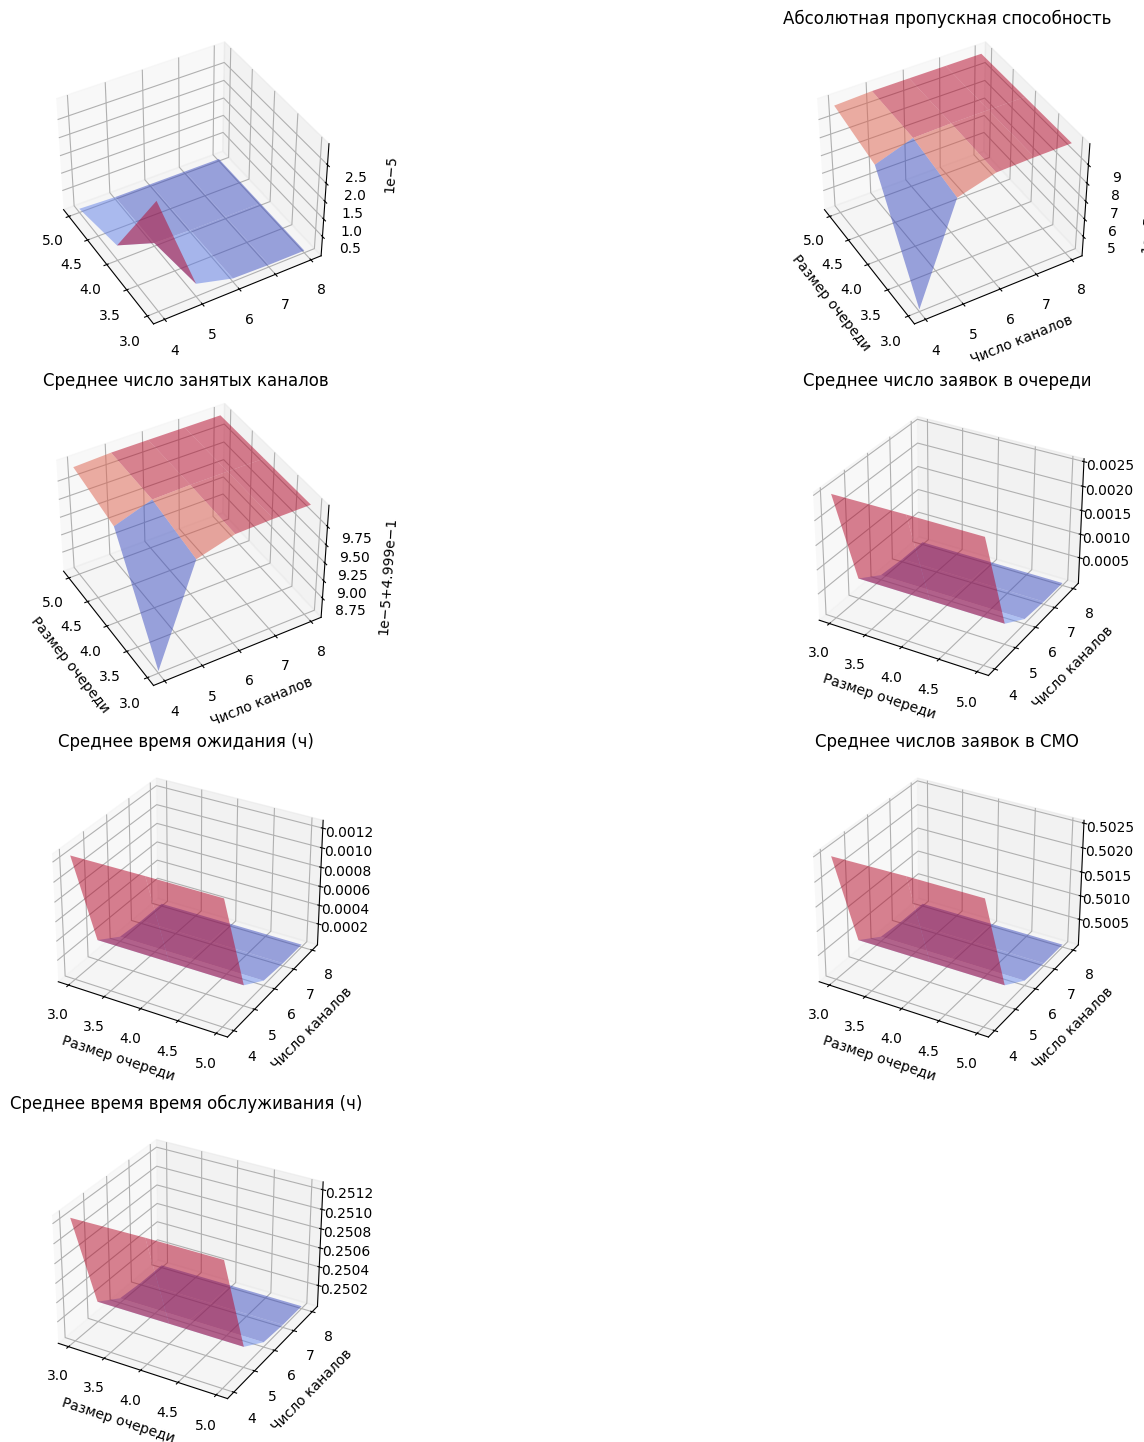

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import factorial

def read_range(tp, size, msg):
    r = [tp(x) for x in input(msg).split()]
    if len(r) != size:
        raise Exception(f"Input size must be {size}")
    return r

while True:
    try:
        queue_range = read_range(int, 2, "Введите отрезок для длины очереди (два числа через пробел)")
        channels_range = read_range(int, 2, "Введите отрезок для числа каналов (два числа через пробел)")
        break
    except Exception as e:
        print(e)

def calc_p0(y, n, m):
    p0 = sum([y**n/factorial(x) for x in range(n+1)])
    return 1/(p0 + y**(n+1)/(n*factorial(n)) * (1-(y/n)**m)/(1-(y/n)))

def calc_p_decline(p0, y, n, m):
    return ((y**(m+n))/(n**m*factorial(n)))*p0

def calc_mean_requests_in_queue(p0, y, n, m):
    mr_1 = y**(n+1)/(n*factorial(n))
    mr_2 = 1-((y/n)**m)*(m + 1 - m*y/n)
    mr_3 = (1 - (y/n))**2
    return mr_1*mr_2*p0/mr_3

queue_space = np.linspace(queue_range[0], queue_range[1], int((queue_range[1]-queue_range[0]+1)), dtype=int).astype("int64")
channel_space = np.linspace(channels_range[0], channels_range[1], int((channels_range[1]-channels_range[0] + 1)), dtype=int).astype("int64")

fig = plt.figure(figsize=(18,18))

ax1 = fig.add_subplot(421, projection="3d")
ax2 = fig.add_subplot(422, projection="3d")
ax3 = fig.add_subplot(423, projection="3d")
ax4 = fig.add_subplot(424, projection="3d")
ax5 = fig.add_subplot(425, projection="3d")
ax6 = fig.add_subplot(426, projection="3d")
ax7 = fig.add_subplot(427, projection="3d")

q, c = np.meshgrid(queue_space, channel_space)
y = 0.5

p_0 = np.zeros((len(q), len(q[0])))
p_decline = np.zeros((len(q), len(q[0])))
abs_bandwidth = np.zeros((len(q), len(q[0])))
mean_busy = np.zeros((len(q), len(q[0])))
mean_req_queue = np.zeros((len(q), len(q[0])))
mean_wait_time = np.zeros((len(q), len(q[0])))
mean_req = np.zeros((len(q), len(q[0])))
mean_service_time = np.zeros((len(q), len(q[0])))

for i in range(len(q)):
    for j in range(len(q[0])):
        p_0[i][j] = calc_p0(y, c[i][j], q[i][j])
        p_decline[i][j] = calc_p_decline(p_0[i][j], y, c[i][j], q[i][j])
        abs_bandwidth[i][j] = 2*(1-p_decline[i][j])
        mean_busy[i][j] = abs_bandwidth[i][j] / 4
        mean_req_queue[i][j] = calc_mean_requests_in_queue(p_0[i][j], y, c[i][j], q[i][j])
        mean_wait_time[i][j] = mean_req_queue[i][j]/2
        mean_req[i][j] = mean_req_queue[i][j] + mean_busy[i][j]
        mean_service_time[i][j] = mean_req[i][j]/2

ax1.plot_surface(q, c, p_decline, alpha=0.5,cmap='coolwarm')
ax4.set_title("Вероятность отказа")
ax4.set_xlabel("Размер очереди")
ax4.set_ylabel("Число каналов")
ax1.view_init(-140, 30)
ax1.invert_zaxis()

ax2.plot_surface(q, c, abs_bandwidth, alpha=0.5,cmap='coolwarm')
ax2.set_title("Абсолютная пропускная способность")
ax2.set_xlabel("Размер очереди")
ax2.set_ylabel("Число каналов")
ax2.view_init(-140, 30)
ax2.invert_zaxis()

ax3.plot_surface(q, c, mean_busy, alpha=0.5,cmap='coolwarm')
ax3.set_title("Среднее число занятых каналов")
ax3.set_xlabel("Размер очереди")
ax3.set_ylabel("Число каналов")
ax3.view_init(-140, 30)
ax3.invert_zaxis()

ax4.plot_surface(q, c, mean_req_queue, alpha=0.5,cmap='coolwarm')
ax4.set_title("Среднее число заявок в очереди")
ax4.set_xlabel("Размер очереди")
ax4.set_ylabel("Число каналов")

ax5.plot_surface(q, c, mean_wait_time, alpha=0.5,cmap='coolwarm')
ax5.set_title("Среднее время ожидания (ч)")
ax5.set_xlabel("Размер очереди")
ax5.set_ylabel("Число каналов")

ax6.plot_surface(q, c, mean_req, alpha=0.5,cmap='coolwarm')
ax6.set_title("Среднее числов заявок в СМО")
ax6.set_xlabel("Размер очереди")
ax6.set_ylabel("Число каналов")

ax7.plot_surface(q, c, mean_service_time, alpha=0.5,cmap='coolwarm')
ax7.set_title("Среднее время время обслуживания (ч)")
ax7.set_xlabel("Размер очереди")
ax7.set_ylabel("Число каналов")

plt.show()